In [351]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [352]:
columns=["count", "season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "monht", 
        "day", "dayfweek", "hour"]


In [353]:

df=pd.read_csv("train.csv", parse_dates=['datetime'], index_col=0)
df_test=pd.read_csv("test.csv", parse_dates=['datetime'], index_col=0)

In [354]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [355]:
def add_features(df):
    df["year"]=df.index.year
    df["month"]=df.index.month
    df["day"]=df.index.day
    df["dayofweek"]=df.index.dayofweek
    df["hour"]=df.index.hour
    

In [356]:
df.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [357]:
add_features(df)
add_features(df_test)

In [358]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [338]:
df.to_csv('bike_train.csv', index=False)
df_test.to_csv('bike_test.csv', index=False)

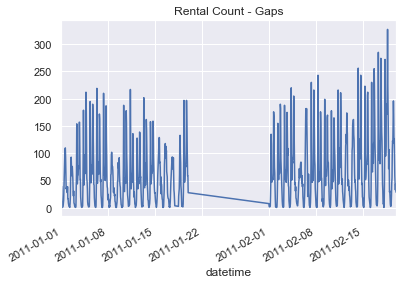

In [235]:
# Predict the missing data
import seaborn as sns; sns.set()

plt.title(df["2011-01":"2011-02"]['count'].plot())
plt.title("Rental Count - Gaps")
plt.show()

In [236]:
df["2011-01":"2011-02"]['count']

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
                       ..
2011-02-19 19:00:00    59
2011-02-19 20:00:00    47
2011-02-19 21:00:00    33
2011-02-19 22:00:00    44
2011-02-19 23:00:00    29
Name: count, Length: 877, dtype: int64

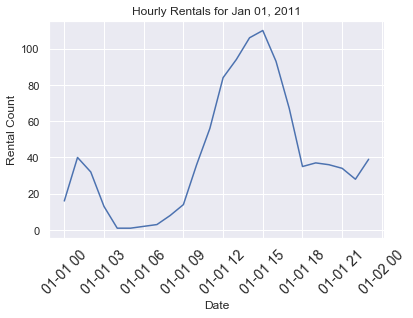

In [237]:
# Rental Change Hourly
plt.plot(df["2011-01-01"]['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for Jan 01, 2011')
plt.show()

In [238]:
df["2011-01-01"]['count'].count()

24

In [239]:
df["2011-01-01"]['count']

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
2011-01-01 05:00:00      1
2011-01-01 06:00:00      2
2011-01-01 07:00:00      3
2011-01-01 08:00:00      8
2011-01-01 09:00:00     14
2011-01-01 10:00:00     36
2011-01-01 11:00:00     56
2011-01-01 12:00:00     84
2011-01-01 13:00:00     94
2011-01-01 14:00:00    106
2011-01-01 15:00:00    110
2011-01-01 16:00:00     93
2011-01-01 17:00:00     67
2011-01-01 18:00:00     35
2011-01-01 19:00:00     37
2011-01-01 20:00:00     36
2011-01-01 21:00:00     34
2011-01-01 22:00:00     28
2011-01-01 23:00:00     39
Name: count, dtype: int64

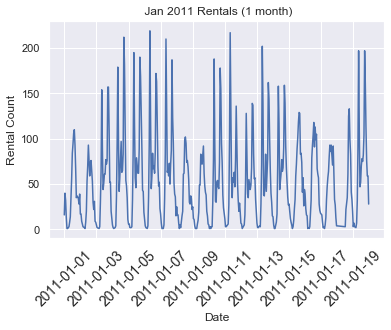

In [240]:
# seasonal 
plt.plot(df["2011-01"]['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.title(" Jan 2011 Rentals (1 month)")
plt.show()

In [241]:
group_hour=df.groupby(['hour'])
average_by_hour=group_hour['count'].mean()

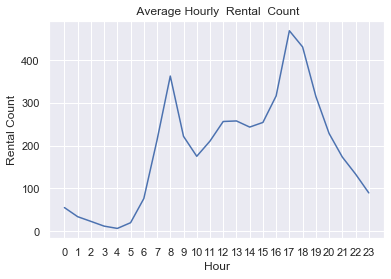

In [242]:
plt.plot(average_by_hour.index, average_by_hour)
plt.xticks(np.arange(24))
plt.xlabel("Hour")
plt.ylabel("Rental Count")
plt.grid(True)
plt.title(" Average Hourly  Rental  Count")
plt.show()

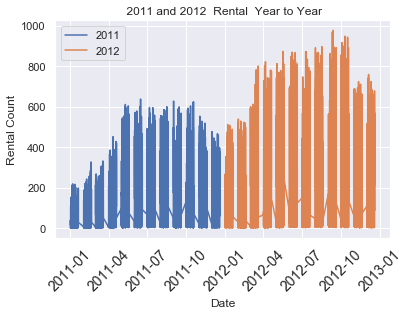

In [243]:
# year to year trend
plt.plot(df['2011']['count'], label='2011')
plt.plot(df['2012']['count'], label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.legend()
plt.title(" 2011 and 2012  Rental  Year to Year")
plt.show()

In [244]:
group_year_month = df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()


In [245]:
average_year_month.index.levels[1]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [246]:
average_year_month[2011]

month
1      54.645012
2      73.641256
3      86.849776
4     111.026374
5     174.809211
6     196.877193
7     203.614035
8     182.666667
9     174.622517
10    174.773626
11    155.458333
12    134.173246
Name: count, dtype: float64

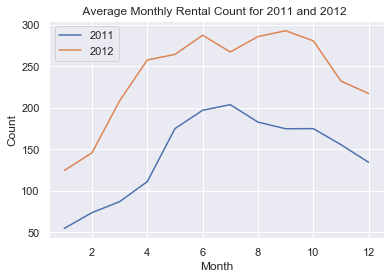

In [247]:
for year in average_year_month.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    sns.lineplot(average_year_month[year].index,average_year_month[year],label=year)
    
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.title(" Average Monthly Rental Count for 2011 and 2012  ")
plt.show()

In [248]:
group_year_hour = df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()



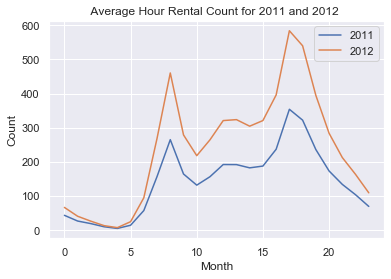

In [249]:
for year in average_year_month.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    sns.lineplot(average_year_hour[year].index,average_year_hour[year],label=year)
    
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.title(" Average Hour Rental Count for 2011 and 2012  ")
plt.show()

In [250]:
average_year_hour[year].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

In [251]:
group_working_hour = df.groupby(['workingday','hour'])
average_working_hour = group_working_hour['count'].mean()




In [252]:
group_working_hour.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-15 22:00:00,1,0,0,2,12.30,15.910,42,7.0015,0,26,26,2011,1,15,5,22
2011-01-15 23:00:00,1,0,0,1,12.30,14.395,45,19.0012,5,39,44,2011,1,15,5,23
2011-01-16 05:00:00,1,0,0,2,10.66,12.880,56,11.0014,1,1,2,2011,1,16,6,5


In [253]:
average_working_hour.head()

workingday  hour
0           0       94.489655
            1       71.910345
            2       53.748252
            3       25.534722
            4        8.544828
Name: count, dtype: float64

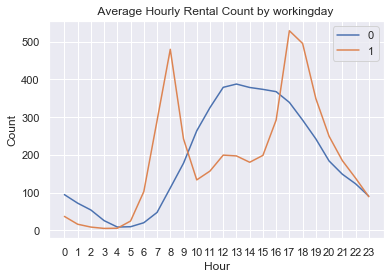

In [254]:
for workingday in average_working_hour.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    sns.lineplot(average_working_hour[workingday].index,average_working_hour[workingday],label=workingday)
    
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(24))
plt.title(" Average Hourly Rental Count by workingday  ")
plt.show()

In [255]:
df.keys()

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [256]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [257]:
# correlatin 
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

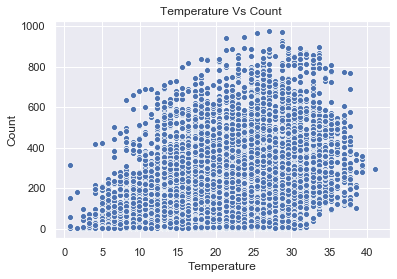

In [258]:
# any relation between  temperature and rental count?
g=sns.scatterplot(x=df.temp, y=df['count'])
g.set(xlabel="Temperature", ylabel="Count", title="Temperature Vs Count ", ) 
# plt.xlabel("Temperature")
# plt.ylabel("Count")
# plt.grid(True)
# plt.title(" Temperature Vs Count  ")
plt.show()

In [259]:
pwd


'/Users/medamin/_Projets/bikeSharing'

In [414]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [415]:
X = df_tr.drop(['count', 'registered', 'casual'], axis=1)
y = df_tr['count']



In [416]:
X_train, X_test, y_train, y_test \
   = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [417]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6966, 13), (2178, 13), (6966,), (2178,))

In [418]:
regressor=xgb.XGBRegressor(max_depth=5, n_estimators=150)

In [419]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [420]:
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[14:06:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:240.088	validation_1-rmse:240.043
[1]	validation_0-rmse:221.004	validation_1-rmse:220.856
[2]	validation_0-rmse:204.105	validation_1-rmse:204.119
[3]	validation_0-rmse:189.135	validation_1-rmse:189.36
[4]	validation_0-rmse:176.034	validation_1-rmse:176.262
[5]	validation_0-rmse:164.756	validation_1-rmse:165.048
[6]	validation_0-rmse:154.652	validation_1-rmse:155.027
[7]	validation_0-rmse:145.904	validation_1-rmse:146.293


/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[8]	validation_0-rmse:138.32	validation_1-rmse:138.822
[9]	validation_0-rmse:131.576	validation_1-rmse:132.24
[10]	validation_0-rmse:124.305	validation_1-rmse:125.256
[11]	validation_0-rmse:118.07	validation_1-rmse:119.318
[12]	validation_0-rmse:110.303	validation_1-rmse:111.22
[13]	validation_0-rmse:105.064	validation_1-rmse:105.787
[14]	validation_0-rmse:100.613	validation_1-rmse:101.442
[15]	validation_0-rmse:95.8248	validation_1-rmse:96.7013
[16]	validation_0-rmse:92.4558	validation_1-rmse:93.3187
[17]	validation_0-rmse:89.4898	validation_1-rmse:90.5547
[18]	validation_0-rmse:86.0617	validation_1-rmse:87.1416
[19]	validation_0-rmse:83.1039	validation_1-rmse:84.2239
[20]	validation_0-rmse:80.224	validation_1-rmse:81.4722
[21]	validation_0-rmse:78.0548	validation_1-rmse:79.3142
[22]	validation_0-rmse:75.7716	validation_1-rmse:77.1072
[23]	validation_0-rmse:72.3793	validation_1-rmse:73.6719
[24]	validation_0-rmse:70.9559	validation_1-rmse:72.4327
[25]	validation_0-rmse:69.8401	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [367]:
eval_result=regressor.evals_result()

In [368]:
training_rounds=range(len(eval_result['validation_0']['rmse']))

In [369]:
print(training_rounds)

range(0, 150)


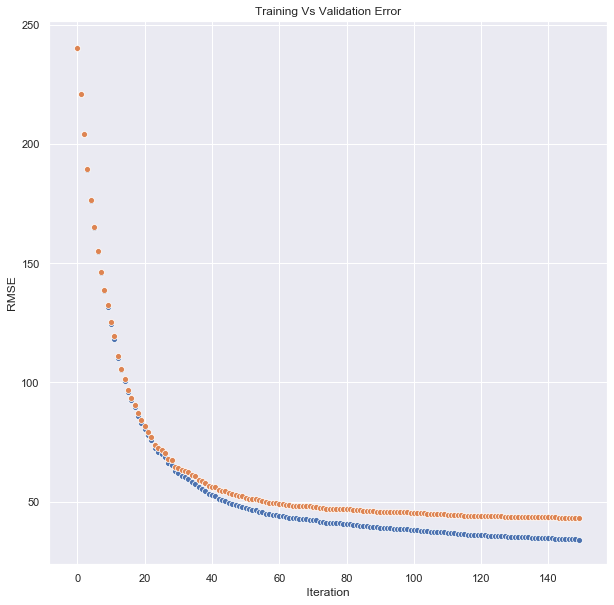

In [384]:
plt.rcParams["figure.figsize"]=(10,10)
ax=sns.scatterplot(training_rounds, eval_result['validation_0']['rmse'])
ax=sns.scatterplot(training_rounds, eval_result['validation_1']['rmse'])
ax.set(xlabel=" Iteration ", ylabel="RMSE", title="Training Vs Validation Error")
plt.show()

<Figure size 720x720 with 0 Axes>

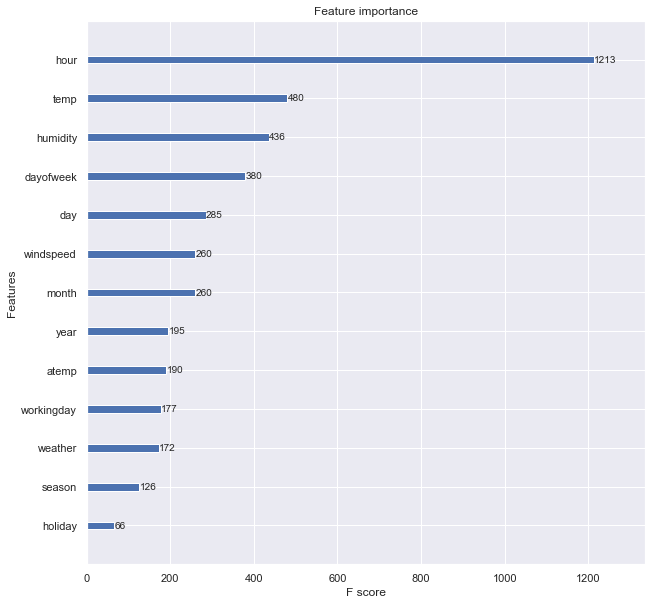

In [421]:
plt.figure(figsize=(10,10))
xgb.plot_importance(regressor)
plt.show()

In [422]:
# Verify Quality  using validation dataset
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
3709,3,1,0,2,28.70,33.335,74,11.0014,2011,9,5,0,11
6741,1,0,0,2,17.22,21.210,94,11.0014,2012,3,18,6,4
9848,4,0,0,1,26.24,31.060,44,12.9980,2012,10,14,6,17
1410,2,0,1,1,31.16,33.335,23,36.9974,2011,4,4,0,15
10672,4,0,1,2,16.40,20.455,66,22.0028,2012,12,11,1,2


In [423]:
X_test.keys()

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [424]:
result=regressor.predict(X_test)

In [425]:
result[:5]

array([249.83987 ,  10.284987, 602.20123 ,  92.41939 ,  16.491997],
      dtype=float32)

In [429]:
type(y_val)

pandas.core.series.Series

In [410]:
type(X_test)

pandas.core.frame.DataFrame

In [431]:
y_test['count_predicted']=result

In [432]:
result.shape, df.shape, X_test.shape, y_test.shape, y_val.shape

((2178,), (10886, 16), (2178, 13), (2179,), (1742,))

In [433]:
result

array([249.83987 ,  10.284987, 602.20123 , ...,  36.487606, 291.34882 ,
       128.70288 ], dtype=float32)

In [434]:
y_test.head()

3709     308
6741      14
9848     539
1410     143
10672      1
Name: count, dtype: object

In [319]:

df_tr=pd.read_csv("bike_train.csv")
df_tes=pd.read_csv("bike_test.csv")

In [321]:
df_tes.shape

(6493, 13)

In [326]:
df.shape

(10886, 16)

In [327]:

X = df_tr.drop(['count', 'registered', 'casual'], axis=1)
y = df_tr['count']




In [328]:
df_tr.keys()

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [329]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=52)

In [287]:
regressor=xgb.XGBRegressor(max_depth=5, n_estimators=150)

In [288]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [289]:
regressor.fit(X_train, y_train , eval_set=[(X_train, y_train), (X_test, y_test)])

[13:17:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:239.765	validation_1-rmse:246.262
[1]	validation_0-rmse:220.753	validation_1-rmse:227.092
[2]	validation_0-rmse:203.998	validation_1-rmse:210.476
[3]	validation_0-rmse:188.989	validation_1-rmse:195.312
[4]	validation_0-rmse:175.811	validation_1-rmse:182.226
[5]	validation_0-rmse:163.952	validation_1-rmse:170.226
[6]	validation_0-rmse:153.729	validation_1-rmse:159.953
[7]	validation_0-rmse:144.891	validation_1-rmse:151.143
[8]	validation_0-rmse:137.257	validation_1-rmse:143.516
[9]	validation_0-rmse:130.212	validation_1-rmse:136.463
[10]	validation_0-rmse:124.175	validation_1-rmse:130.389
[11]	validation_0-rmse:118.657	validation_1-rmse:124.702
[12]	validation_0-rmse:112.376	validation_1-rmse:118.52
[13]	validation_0-rmse:106.948	validation_1-rmse:113.185
[14]	validation_0-rmse:102.246	validation_1-rmse:108.562
[15]	validation_0-rmse:96.97	validation_

[142]	validation_0-rmse:34.292	validation_1-rmse:42.7871
[143]	validation_0-rmse:34.2094	validation_1-rmse:42.7727
[144]	validation_0-rmse:34.1143	validation_1-rmse:42.6954
[145]	validation_0-rmse:34.0742	validation_1-rmse:42.6814
[146]	validation_0-rmse:34.0312	validation_1-rmse:42.6537
[147]	validation_0-rmse:34.0225	validation_1-rmse:42.6479
[148]	validation_0-rmse:33.904	validation_1-rmse:42.5382
[149]	validation_0-rmse:33.8095	validation_1-rmse:42.4804


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [290]:
eval_result=regressor.evals_result()

In [291]:
training_rounds=range(len(eval_result['validation_0']['rmse']))

In [292]:
print(training_rounds)

range(0, 150)


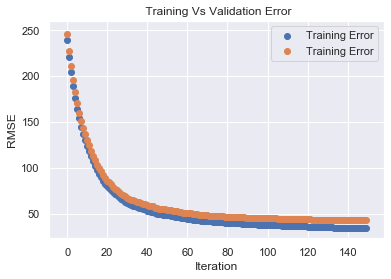

In [293]:
plt.scatter(training_rounds, eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(training_rounds, eval_result['validation_1']['rmse'], label='Training Error')
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title(" Training Vs Validation Error")
plt.legend()
plt.show()

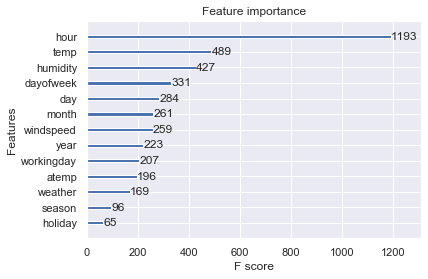

In [294]:
xgb.plot_importance(regressor)
plt.show()

In [311]:
  # verify Quality using Validation dataset
X_test.head()

,ColumnA,ColumnB,Country_Code
48,1,10,0
27,1,10,3
58,1,10,2
30,1,10,2
23,1,10,3


In [344]:
print(X_test[:5])

    ColumnA  ColumnB  Country_Code
48        1       10             0
27        1       10             3
58        1       10             2
30        1       10             2
23        1       10             3


In [300]:
result=regressor.predict(X_test)

In [301]:
result[:5]

array([266.22183 ,  78.09209 ,  10.292493,  69.43123 , 141.07008 ],
      dtype=float32)

In [309]:
result.shape

(3266,)

In [310]:
X_test.shape

(24, 3)

In [302]:
X_test['counted_predicted']=result

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
X_test.head()

,ColumnA,ColumnB,Country_Code
48,1,10,0
27,1,10,3
58,1,10,2
30,1,10,2
23,1,10,3


In [ ]:
X_test[X_test['counted_predicted']<0]

In [304]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

df = pd.DataFrame({
        'Country': ['AB', 'CD', 'EF', 'FG']*20,
        'ColumnA' : [1]*20*4,'ColumnB' : [10]*20*4, 'Label': [1,0,1,0]*20
    })

df['Country_Code'] = df['Country'].astype('category').cat.codes

In [305]:
X = df.loc[:, df.columns.drop(['Label','Country'])]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df.Country_Code)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)